In [ ]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="torch.nn.functional")

In [ ]:
from fastai.vision import *
from fastai import *

In [ ]:
folder = 'black'
file = 'black.csv'

In [ ]:
folder = 'teddy'
file = 'teddy.csv'

In [ ]:
folder = 'grizzly'
file = 'grizzly.csv'

In [ ]:
path = Path("data/bears")
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [ ]:
path.ls()

[PosixPath('data/bears/black'),
 PosixPath('data/bears/grizzly'),
 PosixPath('data/bears/teddy'),
 PosixPath('data/bears/black.csv'),
 PosixPath('data/bears/teddy.csv'),
 PosixPath('data/bears/grizzly.csv')]

In [ ]:
classes = ['black', 'grizzly', 'teddy']

In [ ]:
download_images(path/file, dest, max_pics=200)

In [ ]:
import numpy as np

In [ ]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
                                 ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [ ]:
data.classes

['black', 'grizzly', 'teddy']

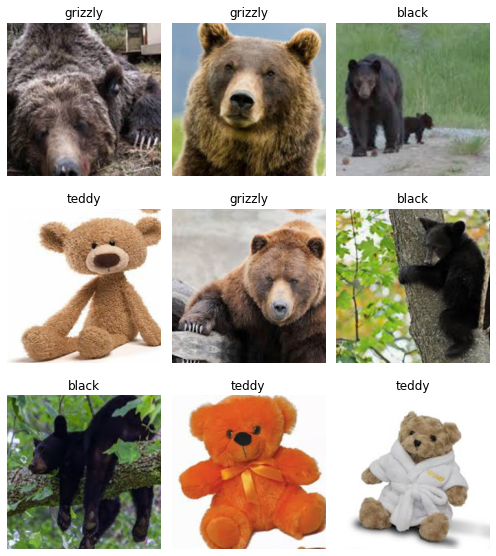

In [ ]:
data.show_batch(rows=3, figsize=(7,8))

In [ ]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['black', 'grizzly', 'teddy'], 3, 109, 27)

In [ ]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [ ]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,2.205811,1.914343,0.518519,00:02
1,1.836111,0.374255,0.148148,00:01
2,1.418723,0.200509,0.074074,00:01
3,1.127534,0.161618,0.074074,00:01


In [ ]:
learn.save('stage-1.teddy')

In [ ]:
learn.unfreeze()

In [ ]:
learn.lr_find()

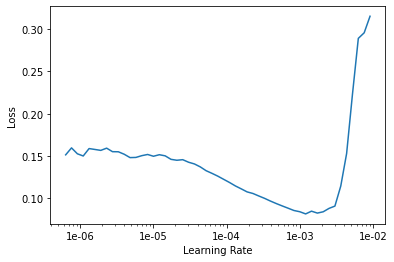

In [ ]:
learn.recorder.plot()

In [ ]:
learn.fit_one_cycle(2, max_lr=slice(3e-5,3e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.172728,0.140601,0.037037,00:01
1,0.115469,0.115898,0.037037,00:01


In [ ]:
learn.save('stage-2.teddy')

In [ ]:
# Interpretation
learn.load('stage-2.teddy')

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)

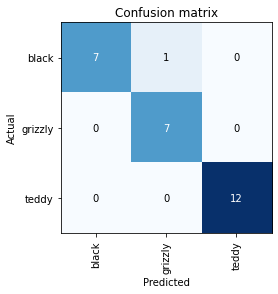

In [ ]:
interp.plot_confusion_matrix()

In [ ]:
# Cleaning Up => FileDeleter
from fastai.widgets import *

losses, idxs = interp.top_losses()
top_loss_paths = data.valid_ds.x[idxs]

In [ ]:
# fd = FileDeleter/ImageDeleter(file_paths=top_loss_paths) it doesn't work on Google colab

In [ ]:
#from ClassLosses import *
#ClassLosses(interp, "black")

In [ ]:
# Putting your model in production

In [ ]:
data.classes

['black', 'grizzly', 'teddy']

In [ ]:
#fastai.defaults.device = torch.device('cpu)

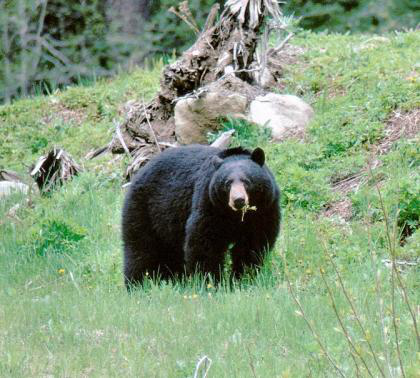

In [ ]:
img = open_image('/content/black_bear.jpg')
img

In [ ]:
classes = ['black', 'grizzly', 'teddy']
data2 = ImageDataBunch.single_from_classes(path, classes, ds_tfms=get_transforms(), size=224).normalize(imagenet_stats)
learn = cnn_learner(data2, models.resnet34)
learn.load('stage-2.teddy')

In [ ]:
pred_class,pred_idx,outputs = learn.predict(img)
#img.show()
print ("It is a", pred_class)

It is a black
